In [2]:
import pandas as pd
import numpy as np
from graphviz import Digraph
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/home/VENV36/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


<div class="jumbotron">
    <h1 class="display-1">分类技术</h1>
    <hr class="my-4">
    <p>主讲：李岩</p>
    <p>管理学院</p>
    <p>liyan@cumtb.edu.cn</p>
</div

> 如何判断贷款者是否会拖欠贷款？

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
debtDict = {'Tid': range(10), 
            '有房者': ['是', '否', '否', '是', '否', '否', '是','否', '否', '否'], 
            '婚姻状况': ['单身', '已婚', '单身', '已婚', '离异', '已婚', '离异', '单身', '已婚', '单身'], 
            '年收入': ['125K', '100K', '70K', '120K', '95K', '60K', '220K', '85K', '75K', '90K'], 
            '拖欠贷款者': ['否', '否', '否', '否', '是', '否', '否', '是', '否', '是']}

In [4]:
pd.DataFrame(debtDict)

,Tid,有房者,婚姻状况,年收入,拖欠贷款者
0,0,是,单身,125K,否
1,1,否,已婚,100K,否
2,2,否,单身,70K,否
3,3,是,已婚,120K,否
4,4,否,离异,95K,是
5,5,否,已婚,60K,否
6,6,是,离异,220K,否
7,7,否,单身,85K,是
8,8,否,已婚,75K,否
9,9,否,单身,90K,是


## 基本概念

### 分类（classification） 

- 给定一条记录$(\boldsymbol{x}, y)$，其中，$y$是分类属性或者目标属性，$\boldsymbol{x}$是该记录预测属性的集合

- 通过学习得到一个**目标函数**（target function）$f$，把每个属性集$\boldsymbol{x}$映射到一个预先定义的**类标签**$y$

$$
y = f(\boldsymbol{x})
$$

- 目标函数也被称作**分类模型**（classification model）

#### 分类模型的功能

1. 描述性建模：识别哪些属性决定一个数据记录属于哪个类别

2. 预测性建模：根据已知的数据记录的属性，自动识别该数据记录属于的类别

#### 分类模型的适用领域

- 非常适合分类属性是**二元**或者**标称**类型的数据集

- 不适用于分类属性是**序数**或**连续**类型的数据集
    + 因为没有考虑标签之间的顺序大小关系

任务|属性集$\boldsymbol{x}$|分类属性$y$
---|---|---
分类e-mail|从e-mail的header和内容中提取的特征|垃圾邮件`or`非垃圾邮件
识别癌变细胞|通过磁共振扫描提取的特征|恶性的`or`良性的
分类星系|从天文望远镜获取的图像中提取特征|椭圆的、螺旋的、`or`不规则星系

### 建立分类模型的一般方法

<center><img src="./img/classification/classificationProcess.png" width=80%></center>

#### 训练集与检验集

- 训练集（training set）：由类标签已知的数据记录组成，用于建立分类模型

- 检验集（test set）：用来检验分类规则的数据记录集合

In [163]:
import os
from graphviz import Digraph
os.environ["PATH"] += os.pathsep + 'D:/Graphviz2.38/bin'
ps = Digraph(name='classification', format='svg', encoding='utf-8', node_attr={'shape': 'plaintext'}, graph_attr={'rankdir': 'LR', 'rank': 'same'}, edge_attr={'arrowhead': 'vee', 'arrowsize': '1'})
with ps.subgraph(name='set') as a:
    a.node('B0', '检验集', fontname="STKAITI")
    a.node('A', '''<
    <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
        <TH>
            <TD BGCOLOR="lightblue">Tid</TD>
            <TD BGCOLOR="lightblue">有房者</TD>
            <TD BGCOLOR="lightblue">婚姻状况</TD>
            <TD BGCOLOR="lightblue">年收入</TD>
            <TD BGCOLOR="lightblue">拖欠贷款</TD>
        </TH>
        <TR>
            <TD>0</TD>
            <TD>是</TD>
            <TD>单身</TD>
            <TD>125K</TD>
            <TD>否</TD>
        </TR>
        <TR>
            <TD>1</TD>
            <TD>否</TD>
            <TD>已婚</TD>
            <TD>100K</TD>
            <TD>否</TD>
        </TR>
        <TR>
            <TD>2</TD>
            <TD>否</TD>
            <TD>单身</TD>
            <TD>70K</TD>
            <TD>否</TD>
        </TR>
        <TR>
            <TD>3</TD>
            <TD>是</TD>
            <TD>已婚</TD>
            <TD>120K</TD>
            <TD>否</TD>
        </TR>
        <TR>
            <TD>4</TD>
            <TD>否</TD>
            <TD>离异</TD>
            <TD>95K</TD>
            <TD BGCOLOR="sandybrown">是</TD>
        </TR>
        <TR>
            <TD>5</TD>
            <TD>否</TD>
            <TD>已婚</TD>
            <TD>60K</TD>
            <TD>否</TD>
        </TR>
        <TR>
            <TD>6</TD>
            <TD>是</TD>
            <TD>离异</TD>
            <TD>220K</TD>
            <TD>否</TD>
        </TR>
        <TR>
            <TD>7</TD>
            <TD>否</TD>
            <TD>单身</TD>
            <TD>85K</TD>
            <TD BGCOLOR="sandybrown">是</TD>
        </TR>
        <TR>
            <TD>8</TD>
            <TD>否</TD>
            <TD>已婚</TD>
            <TD>75K</TD>
            <TD>否</TD>
        </TR>
            <TR>
            <TD>9</TD>
            <TD>否</TD>
            <TD>单身</TD>
            <TD>90K</TD>
            <TD BGCOLOR="sandybrown">是</TD>
        </TR>
    </TABLE>>''', fontname="STKAITI")

    a.node('B', '''<
    <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
        <TH>
            <TD BGCOLOR="lightblue">Tid</TD>
            <TD BGCOLOR="lightblue">有房者</TD>
            <TD BGCOLOR="lightblue">婚姻状况</TD>
            <TD BGCOLOR="lightblue">年收入</TD>
            <TD BGCOLOR="lightblue">拖欠贷款</TD>
        </TH>
        <TR>
            <TD>10</TD>
            <TD>是</TD>
            <TD>单身</TD>
            <TD>200K</TD>
            <TD>？</TD>
        </TR>
        <TR>
            <TD>11</TD>
            <TD>否</TD>
            <TD>已婚</TD>
            <TD>80K</TD>
            <TD>？</TD>
        </TR>
        <TR>
            <TD>12</TD>
            <TD>否</TD>
            <TD>单身</TD>
            <TD>70K</TD>
            <TD>？</TD>
        </TR>
        <TR>
            <TD>13</TD>
            <TD>是</TD>
            <TD>已婚</TD>
            <TD>100K</TD>
            <TD>？</TD>
        </TR>
        <TR>
            <TD>14</TD>
            <TD>否</TD>
            <TD>离异</TD>
            <TD>65K</TD>
            <TD>？</TD>
        </TR>
    </TABLE>>''', fontname="STKAITI")
    a.node('A0', '训练集', fontname="STKAITI")

with ps.subgraph(name='module') as b:
    b.node('C', '学习算法', shape='rectangle', fontname="STKAITI")
    b.node('D', '归纳：\n学习模型', shape='box', fontname="STKAITI")
    b.node('E', '推论：\n应用模型', shape='box', fontname="STKAITI")
#         c.edges(['CG', 'CH', 'CI', 'CJ', 'CK', 'CL', 'CM'])

ps.node('F', '模型', shape='folder', fontname="STKAITI")
ps.edges(['AD', 'CD', 'DF', 'FE', 'EB'])
ps.view()

'classification.gv.svg'

#### 分类算法

+ k最近邻分类
+ **决策树**
+ 朴素贝叶斯分类
+ 逻辑回归
+ **神经网络**
+ 支持向量机
+ 随机森林

#### 混淆矩阵（confusion matrix）

- 由分类模型做出的正确和错误的分类结果构成的矩阵

- 二元分类问题的混淆矩阵

In [231]:
import os
from graphviz import Digraph
os.environ["PATH"] += os.pathsep + 'D:/Graphviz2.38/bin'
ps = Digraph(name='confusionMatrix', format='svg', encoding='utf-8', node_attr={'shape': 'plaintext'}, graph_attr={'rankdir': 'LR', 'dpi': '120'})
ps.node('B', '''<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" WIDTH="600" HEIGHT="200">
    <TR>
        <TD COLSPAN="2" ROWSPAN="2"></TD>
        <TD BGCOLOR="lightblue" COLSPAN="2">预测的类</TD>
    </TR>
    <TR>
        <TD>类=1</TD>
        <TD>类=0</TD>
    </TR>
    <TR>
        <TD BGCOLOR="sandybrown"  ROWSPAN="2">实际的类</TD>
        <TD>类=1</TD>
        <TD>f_11</TD>
        <TD>f_10</TD>
    </TR>
    <TR>
        <TD>类=0</TD>
        <TD>f_01</TD>
        <TD>f_00</TD>
    </TR>
</TABLE>>''', fontname="STKAITI")
ps.view()

'confusionMatrix.gv.svg'

![](./img/classification/confusionMatrix.gv.svg)

#### 性能度量（performance metric）

- 汇总混淆矩阵的信息

- 准确率（accuracy）

$$
准确率=\frac{正确预测数}{预测总数}=\frac{f_{11}+f_{00}}{f_{11}+f_{10}+f_{01}+f_{00}}
$$

- 错误率（error rate）

$$
错误率=\frac{错误预测数}{预测总数}=\frac{f_{10}+f_{01}}{f_{11}+f_{10}+f_{01}+f_{00}}
$$

$$
错误率+准确率=1
$$

## 决策树

In [2]:
import os
from graphviz import Digraph
os.environ["PATH"] += os.pathsep + 'D:/Graphviz2.38/bin'
classificationSample = Digraph(name='classificationSample', format='svg', encoding='utf-8', node_attr={'shape': 'plaintext'}, graph_attr={'rankdir': 'LR', 'rank': 'same'}, edge_attr={'arrowhead': 'vee', 'arrowsize': '1'})
classificationSample.node('A', '''<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
    <TH>
        <TD BGCOLOR="lightblue">Tid</TD>
        <TD BGCOLOR="lightblue">有房者</TD>
        <TD BGCOLOR="lightblue">婚姻状况</TD>
        <TD BGCOLOR="lightblue">年收入</TD>
        <TD BGCOLOR="lightblue">拖欠贷款</TD>
    </TH>
    <TR>
        <TD>0</TD>
        <TD>是</TD>
        <TD>单身</TD>
        <TD>125K</TD>
        <TD>否</TD>
    </TR>
    <TR>
        <TD>1</TD>
        <TD>否</TD>
        <TD>已婚</TD>
        <TD>100K</TD>
        <TD>否</TD>
    </TR>
    <TR>
        <TD>2</TD>
        <TD>否</TD>
        <TD>单身</TD>
        <TD>70K</TD>
        <TD>否</TD>
    </TR>
    <TR>
        <TD>3</TD>
        <TD>是</TD>
        <TD>已婚</TD>
        <TD>120K</TD>
        <TD>否</TD>
    </TR>
    <TR>
        <TD>4</TD>
        <TD>否</TD>
        <TD>离异</TD>
        <TD>95K</TD>
        <TD BGCOLOR="sandybrown">是</TD>
    </TR>
    <TR>
        <TD>5</TD>
        <TD>否</TD>
        <TD>已婚</TD>
        <TD>60K</TD>
        <TD>否</TD>
    </TR>
    <TR>
        <TD>6</TD>
        <TD>是</TD>
        <TD>离异</TD>
        <TD>220K</TD>
        <TD>否</TD>
    </TR>
    <TR>
        <TD>7</TD>
        <TD>否</TD>
        <TD>单身</TD>
        <TD>85K</TD>
        <TD BGCOLOR="sandybrown">是</TD>
    </TR>
    <TR>
        <TD>8</TD>
        <TD>否</TD>
        <TD>已婚</TD>
        <TD>75K</TD>
        <TD>否</TD>
    </TR>
        <TR>
        <TD>9</TD>
        <TD>否</TD>
        <TD>单身</TD>
        <TD>90K</TD>
        <TD BGCOLOR="sandybrown">是</TD>
    </TR>
</TABLE>>''', fontname="STKAITI")
classificationSample.render(directory='./img/classification/')

'./img/classification/classificationSample.gv.svg'

<center><img src="./img/classification/classificationSample.gv.svg" with=100%></center>

In [3]:
from graphviz import Digraph
g = Digraph(name='decisionTree', format='svg', encoding='UTF-8', node_attr={'shape': 'rect', 'fontname': 'STKAITI'})
g.node('A0', '区分属性', shape='plaintext')
g.node('A', '有房者', shape='oval')
g.node('B', '无拖欠', style='filled', color='lightblue')
g.node('C', '婚姻状况', shape='oval')
g.node('D', '年收入', shape='oval')
g.node('E', '无拖欠', style='filled', color='lightblue')
g.node('F', '无拖欠', style='filled', color='lightblue')
g.node('G', '拖欠', style='filled', color='sandybrown')
g.edge('A0', 'A', style='dashed')
g.edge('A0', 'C', style='dashed')
g.edge('A', 'B', label='是')
g.edge('A', 'C', label='否')
g.edge('C', 'D', label='单身/离异')
g.edge('C', 'E', label='已婚')
g.edge('D', 'F', label='<80K')
g.edge('D', 'G', label='>80K')
g.render(directory='./img/classification/')

'./img/classification/decisionTree.gv.svg'

<center><img src="./img/classification/decisionTree.gv.svg" with=50%></center>

In [94]:
from graphviz import Digraph
g1 = Digraph(name='decisionTree1', format='svg', encoding='UTF-8', node_attr={'shape': 'rect', 'fontname': 'STKAITI'})
g1.node('A', '有房者', shape='oval')
g1.node('B', '无拖欠', style='filled', color='lightblue', xlabel='{4,0}')
g1.node('C', '婚姻状况', shape='oval')
g1.node('D', '年收入', shape='oval')
g1.node('E', '无拖欠', style='filled', color='lightblue',xlabel='{2,0}')
g1.node('F', '无拖欠', style='filled', color='lightblue',xlabel='{1,0}')
g1.node('G', '拖欠', style='filled', color='sandybrown',xlabel='{0,3}')
g1.edge('C', 'B', label='已婚')
g1.edge('C', 'A', label='单身/离异')
g1.edge('A', 'E', label='有房')
g1.edge('A', 'D', label='无房')
g1.edge('D', 'F', label='<80K')
g1.edge('D', 'G', label='>80K')
g1.render(directory='./img/classification/')

'./img/classification/decisionTree1.gv.svg'

<center><img src="./img/classification/decisionTree1.gv.svg"></center>

> 对于同一个问题而言，决策树不是唯一的

### 基本概念

In [4]:
from graphviz import Digraph
g2 = Digraph(name='decisionTreeC', format='svg', encoding='UTF-8', node_attr={'shape': 'rect', 'fontname': 'STKAITI'})
with g2.subgraph() as a:
    a.attr(rank='same')
    a.node('A', '有房者', shape='oval')
    a.node('A0', '内部结点', shape='plaintext')
    a.edge('A0', 'A', style='dashed')
with g2.subgraph() as a:
    a.attr(rank='same')
    g2.node('C', '婚姻状况', shape='oval')
    a.node('C0', '根结点', shape='plaintext')
    a.edge('C0', 'C', style='dashed')
with g2.subgraph() as a:
    a.attr(rank='same')
    a.node('G0', '叶结点', shape='plaintext')
    a.node('B', '无拖欠', style='filled', color='lightblue')
g2.node('D', '年收入', shape='oval')
g2.node('E', '无拖欠', style='filled', color='lightblue')
g2.node('F', '无拖欠', style='filled', color='lightblue')
g2.node('G', '拖欠', style='filled', color='sandybrown')
g2.edge('G0', 'F', style='dashed')
g2.edge('G0', 'G', style='dashed')
g2.edge('G0', 'B', style='dashed')
g2.edge('G0', 'E', style='dashed')
g2.edge('A0', 'D', style='dashed')
g2.edge('C', 'B', label='已婚')
g2.edge('C', 'A', label='单身/离异')
g2.edge('A', 'E', label='有房')
g2.edge('A', 'D', label='无房')
g2.edge('D', 'F', label='<80K')
g2.edge('D', 'G', label='>80K')
g2.render(directory='./img/classification/')

'./img/classification/decisionTreeC.gv.svg'

<center><img src="./img/classification/decisionTreeC.gv.svg" with=60%></center>

- **根结点**（root node）
    + 没有入边，但有零条或多条出边

- **内部结点**（internal node）
    + 恰有一条入边和两条或多条出边

- **叶结点**（leaf node）
    + 恰有一条入边，但没有出边
    + 又被称为终结点（terminal node）

- 每个叶结点赋予一个类标签

- 每个**非叶**结点包含属性测试的条件

### 构造决策树 

- **Hunt**算法
- CART
- ID3, C4.5
- SLIQ, SPRINT

#### Hunt算法基本思路 

假设$D_t$是一个训练集，构成一个结点$t$

- 如果$D_t$包含的所有数据对象都属于同一个类别$y_t$，那么结点$t$是一个叶结点，标记为$y_t$

- 如果$D_t$包含的数据对象属于多个类别，那么用一个属性尝试将数据对象分成子集。之后，对每个子集再递归应用以上步骤

In [5]:
from graphviz import Digraph
e = Digraph(name='step0', format='svg', node_attr={'shape': 'rect', 'fontname': 'STKAITI'})
e.node('A', '拖欠贷款者', xlabel='(7, 3)')
e.render(directory='./img/classification/')

'./img/classification/step0.gv.svg'

<center><img src="./img/classification/step0.gv.svg" with=100%></center>

In [12]:
from graphviz import Digraph
e1 = Digraph(name='step1', format='svg', node_attr={'shape': 'rect', 'fontname': 'STKAITI'}, edge_attr={'arrowhead': 'vee'})
e1.node('A', '有房者', shape='oval')
e1.node('B', '未拖欠贷款', xlabel='(3, 0)', style='filled', color='lightblue')
e1.node('C', '拖欠贷款', xlabel='(4, 3)')
e1.edge('A', 'B', label='是')
e1.edge('A', 'C', label='否')
e1.render(directory='./img/classification/')

'./img/classification/step1.gv.svg'

<center><img src="./img/classification/step1.gv.svg" width=20%></center>

In [13]:
from graphviz import Digraph
e2 = Digraph(name='step2', format='svg', node_attr={'shape': 'rect', 'fontname': 'STKAITI'}, edge_attr={'arrowhead': 'vee'})
e2.node('A', '有房者', shape='oval')
e2.node('B', '未拖欠贷款', xlabel='(3, 0)', style='filled', color='lightblue')
e2.node('C', '婚姻状况', shape='oval')
e2.node('D', '拖欠贷款', xlabel='(1, 3)')
e2.node('E', '未拖欠贷款', xlabel='(3, 0)', style='filled', color='lightblue')
e2.edge('A', 'B', label='是')
e2.edge('A', 'C', label='否')
e2.edge('C', 'D', label='是')
e2.edge('C', 'E', label='否')
e2.render(directory='./img/classification/')

'./img/classification/step2.gv.svg'

<center><img src="./img/classification/step2.gv.svg" width=20%></center>

In [14]:
from graphviz import Digraph
e3 = Digraph(name='step3', format='svg', node_attr={'shape': 'rect', 'fontname': 'STKAITI'}, edge_attr={'arrowhead': 'vee'})
e3.node('A', '有房者', shape='oval')
e3.node('B', '拖欠贷款', xlabel='(3, 0)', style='filled', color='lightblue')
e3.node('C', '婚姻状况', shape='oval')
e3.node('D', '年收入', shape='oval')
e3.node('E', '未拖欠贷款', xlabel='(3, 0)', style='filled', color='lightblue')
e3.node('F', '未拖欠贷款', xlabel='（1， 0）', style='filled', color='lightblue')
e3.node('G', '拖欠贷款', xlabel='(0, 3)', style='filled', color='sandybrown')
e3.edge('A', 'B', label='是')
e3.edge('A', 'C', label='否')
e3.edge('C', 'D', label='单身/离异')
e3.edge('C', 'E', label='已婚')
e3.edge('D', 'F', label='<80K')
e3.edge('D', 'G', label='>=80K')
e3.render(directory='./img/classification/')

'./img/classification/step3.gv.svg'

<center><img src="./img/classification/step3.gv.svg" width=20%></center>

#### 构造决策树需要考虑的问题 

- 如何选择测试条件？
    + 选择哪个属性作为分裂的条件？
    + 针对每个条件应当如何选择划分点？即，如何评估划分的优劣

- 如何停止树的增长？
    + 直到所有的数据对象都属于**相同**的类别，或都有**相同**的属性值
    + 其他方法

### 选择最佳划分

In [6]:
import pandas as pd
carDict = [
    range(1,21),
    ['男']*6+['女']*4+['男']*4+['女']*6,
    ['家用']+['运动']*8+['豪华']
    +['家用']*3+['豪华']*7,
    ['小']+['中']*2+['大']+['超大']*2+['小']*2+['中']+['大']*2+['超大']+['中']+['超大']+['小']*2
    +['中']*3+['大'],
    ['C0']*10+['C1']*10
]
cardf = pd.DataFrame(carDict,index=['ID', '性别','车型', '大小', '列别']).T

In [7]:
cardf

,ID,性别,车型,大小,列别
0,1,男,家用,小,C0
1,2,男,运动,中,C0
2,3,男,运动,中,C0
3,4,男,运动,大,C0
4,5,男,运动,超大,C0
5,6,男,运动,超大,C0
6,7,女,运动,小,C0
7,8,女,运动,小,C0
8,9,女,运动,中,C0
9,10,女,豪华,大,C0


In [26]:
from graphviz import Digraph
car = Digraph(format='svg', node_attr={'fontname': 'STKAITI', 'shape': 'record'})
# car.node('A', '性别', shape='oval')
# car.node('struct0', '{<g0>C0:6|<g1>C1:4}')
# car.node('struct1', '{<g2>C0:4|<g3>C1:6}')
# car.edge('A', 'struct0:g0', xlabel='男')
# car.edge('A', 'struct1:g2', label='女')
# car.render(filename='./img/classification/carGender')
# car.node('A', '车型', shape='oval')
# car.node('B', '{<t0>C0:1|<t1>C1:3}')
# car.node('C', '{<t2>C0:8|C1:0}')
# car.node('D', '{<t3>C0:1|C1:7}')
# car.edge('A','B', xlabel='家用')
# car.edge('A', 'C', label='运动')
# car.edge('A', 'D', label='豪华')
# car.render(filename='./img/classification/carType')
car.node('A', '顾客ID', shape='oval')
with car.subgraph() as a:
    a.attr(rank='same')
    a.node('B', '{<t0>C0:1|<t1>C1:0}')
    a.node('C', '{<t2>C0:1|C1:0}')
    a.edge('B', 'C', style='dotted', dir='none')

with car.subgraph() as a:
    a.attr(rank='same')
    a.node('D', '{<t3>C0:0|C1:1}')
    a.node('E', '{<t4>C0:0|C1:1}')
    a.edge('D', 'E', style='dotted', dir='none')
car.edge('A','B', xlabel='1')
car.edge('A', 'C', label='10')
car.edge('A', 'D', label='11')
car.edge('A', 'E', label='20')

car.render(filename='./img/classification/carCustomerID')

'./img/classification/carCustomerID.svg'

<center><img src="./img/classification/carCustomerID.svg" width=30%></center>

<center><img src="./img/classification/carGender.svg" width=15%></center>

<center><img src="./img/classification/carType.svg" width=20%></center>

- 最佳选择划分通常根据结点的**不纯性的程度**（degree of impurity）

- 不纯的程度越低，类分布就越倾斜

#### 不纯性度量 

令$p(i|t)$表示给定结点$t$中属于类$i$的记录所占的比例，类别个数为$c$

- 熵（Entropy）

$$ \text{Entropy}(t)=-\sum_{i=0}^{c-1}p(i|t)\log_2p(i|t) $$

> ID3、C4.5算法用熵选择最佳划分

- Gini系数

$$ \text{Gini}(t)=1-\sum_{i=1}^{c-1}\left[p(i|t)\right]^2 $$

> CART算法用Gini系数选择最佳划分
- 每个非叶节点只有两个分支，形成二叉树

假设一个节点中只包含有两个类别（类别1和类别2），各自所占的比例是$p_1$和$p_2$，且$p_1+p_2=1$

[Text(0.5, 0, '$p_1$')]

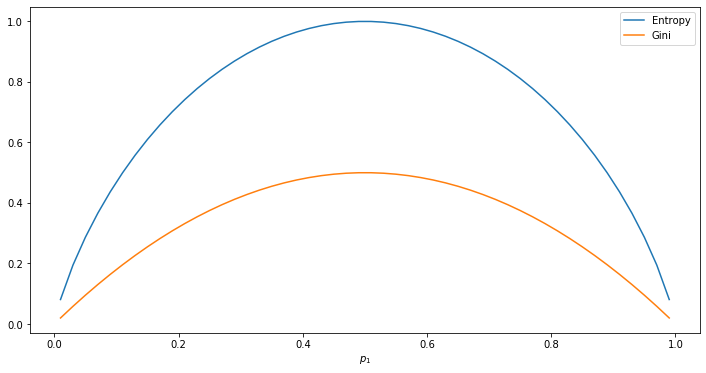

In [6]:
x = np.linspace(0.01,0.99)
x1 = np.ones(x.shape) - x
xE = -x*np.log2(x)-x1*np.log2(x1)
xG = 1-(np.power(x,2)+np.power(x1,2))
df = pd.DataFrame({'x':x,'Entropy':xE,'Gini':xG})
ax = df.plot(x='x',y='Entropy',kind='line',figsize=(12,6))
df.plot(x='x',y='Gini',kind='line',ax=ax)
ax.set(xlabel='$p_1$')

#### 确定测试条件

- 对于选择的一个测试条件，计算父结点（划分前）的不纯度与子结点（划分后）的不纯度的差，差越大，测试条件的效果就越好

### `sklearn`实现 

#### 建立模型

```python
from sklearn import tree
tree.DecisionTreeClassifier(criterion='gini'）
```
- `criterion`：`str`类型，不纯性的度量，可以是`gini`和`entropy`，默认是`gini`

- 生成的决策树的属性（Attributes）
    + `classes_ `：由类标签构成的数组
    + `n_classes_`：`int`，类别的数量
    + `tree_`：建立的决策树

- `feature_importances_`：每个属性在构造决策树中的重要性，即每个属性导致`Gini`系数的减少量（标准化）

In [7]:
from sklearn import tree
dtDebt = tree.DecisionTreeClassifier()
dtDebt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 训练模型

```python
dt.fit(X, y)
```
- `X`：输入的属性矩阵，形状为`[n_samples, n_features]`
- `y`：类别标签数组，形状为`[n_samples]`

In [ ]:
debt=[['是','否','否','是','否','否','是','否','否','否'],
      ['单身','已婚','单身','已婚','离异','已婚','离异','单身','已婚','单身'],
      [125,100,70,120,95,60,220,85,75,90],
      ['否','否','否','否','是','否','否','是','否','是']]
debttrain = pd.DataFrame(debt, index=['有房者','婚姻状况','年收入','拖欠贷款']).T
debttrain

,有房者,婚姻状况,年收入,拖欠贷款
0,是,单身,125,否
1,否,已婚,100,否
2,否,单身,70,否
3,是,已婚,120,否
4,否,离异,95,是
5,否,已婚,60,否
6,是,离异,220,否
7,否,单身,85,是
8,否,已婚,75,否
9,否,单身,90,是


In [34]:
dtDebt.fit(debttrain.iloc[:,:-1], debttrain.iloc[:,-1])

ValueError: could not convert string to float: '是'

#### 转变预测属性

> `DecisionTreeClassifer`只支持数值型预测属性
- 但是对类别标签没有要求

##### **One-Hot Encoding**：将标称属性转换成二元属性

```python
pandas.get_dummies(data, columns=None)
```
- `data`：`Series`类型，或者`DataFrame`类型
- `columns`：列名的`list`类型，数据集中哪些列需要转换，默认是将数据集中所有列进行转换
- 返回值：由二元化的属性构成的`DataFrame`

In [84]:
debttrainOH = pd.get_dummies(debttrain, columns=['有房者','婚姻状况'])
debttrain
debttrainOH
debttrainY = debttrainOH.pop('拖欠贷款')
debttrainOH

,有房者,婚姻状况,年收入,拖欠贷款
0,是,单身,125,否
1,否,已婚,100,否
2,否,单身,70,否
3,是,已婚,120,否
4,否,离异,95,是
5,否,已婚,60,否
6,是,离异,220,否
7,否,单身,85,是
8,否,已婚,75,否
9,否,单身,90,是


,年收入,拖欠贷款,有房者_否,有房者_是,婚姻状况_单身,婚姻状况_已婚,婚姻状况_离异
0,125,否,0,1,1,0,0
1,100,否,1,0,0,1,0
2,70,否,1,0,1,0,0
3,120,否,0,1,0,1,0
4,95,是,1,0,0,0,1
5,60,否,1,0,0,1,0
6,220,否,0,1,0,0,1
7,85,是,1,0,1,0,0
8,75,否,1,0,0,1,0
9,90,是,1,0,1,0,0


,年收入,有房者_否,有房者_是,婚姻状况_单身,婚姻状况_已婚,婚姻状况_离异
0,125,0,1,1,0,0
1,100,1,0,0,1,0
2,70,1,0,1,0,0
3,120,0,1,0,1,0
4,95,1,0,0,0,1
5,60,1,0,0,1,0
6,220,0,1,0,0,1
7,85,1,0,1,0,0
8,75,1,0,0,1,0
9,90,1,0,1,0,0


In [91]:
dtDebt.fit(debttrainOH, debttrainY)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 决策树可视化

##### 决策规则以文本形式输出

```python
tree.export_text(decision_tree, feature_names=None)
```
- `decision_tree`：训练过的决策树模型
- `feature_names`：由预测属性名称构成的列表

In [93]:
print(tree.export_text(dtDebt,feature_names=list(debttrainOH.columns)))

|--- 婚姻状况_已婚 <= 0.50
|   |--- 有房者_否 <= 0.50
|   |   |--- class: 否
|   |--- 有房者_否 >  0.50
|   |   |--- 年收入 <= 77.50
|   |   |   |--- class: 否
|   |   |--- 年收入 >  77.50
|   |   |   |--- class: 是
|--- 婚姻状况_已婚 >  0.50
|   |--- class: 否



##### 决策规则以图形形式输出：Graphviz

- Graphviz是一个开源的流程图绘制软件
- 官方网站：[http://graphviz.org/](http://graphviz.org/)

- 下载安装
    + `Windows`系统下载`graphviz-2.38.msi`：[https://graphviz.gitlab.io/_pages/Download/Download_windows.html](https://graphviz.gitlab.io/_pages/Download/Download_windows.html)
    + `Mac`系统，参考[https://blog.csdn.net/w1573007/article/details/80117725?depth_1-utm_source=distribute.pc_relevant.none-task&utm_source=distribute.pc_relevant.none-task](https://blog.csdn.net/w1573007/article/details/80117725?depth_1-utm_source=distribute.pc_relevant.none-task&utm_source=distribute.pc_relevant.none-task)

- 将Graphviz添加到`Windows`的环境变量

<center><img src="./img/classification/graphvizPath.png" width=60%></center>

> 将`C:\Program Files (x86)\Graphviz2.38\bin\;`添加到`Path`变量值的最后，与前面的项目之间用英文`;`间隔
<center><img src="./img/classification/graphvizPath1.png" width=40%></center>

-  Python中安装Graphviz包

```python
pip install graphviz
```

##### 显示决策树

- `sklearn`中将决策树导出成为`Graphviz`图形的函数

```python
tree.export_graphviz(decision_tree, feature_names=None, class_names=None, filled=False)
```
- `decision_tree`：生成的决策树
- `feature_names`：`str`列表，由预测属性的名称构成
- `class_names`：`str`列表，给每个类别命名，依据类别对应的数值的升序排列，与`dt.classes_`显示的类别顺序一致
- `filled`：是否给节点上色，默认否

In [111]:
dotDataRaw = tree.export_graphviz(dtDebt)

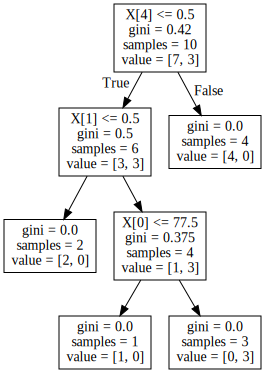

In [112]:
import graphviz
graphRaw = graphviz.Source(dotDataRaw)
graphRaw

In [114]:
dotData = tree.export_graphviz(dtDebt, feature_names=debttrainOH.columns, class_names=['无拖欠','拖欠'], filled=True)
dtDebt.classes_

array(['否', '是'], dtype=object)

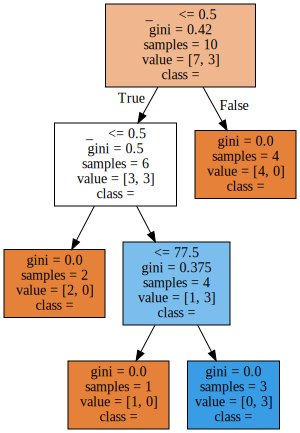

In [115]:
import graphviz
graph = graphviz.Source(dotData)
graph

#### 用决策树预测

```python
dt.predict(X)
```
- `X`：输入的属性矩阵，形状为`[n_samples, n_features]`
- 返回值：预测的类别，形状为`[n_samples]`的数组

```python
dt.predict_proba(X)
```
- 返回值：预测属于每个类别的概率，形状为[n_samples, n_classes]的矩阵，每个样本属于每个类别的概率的顺序与`dt.classes_`一致

In [108]:
debtt = [['是','否','否','是','否'],
         ['单身','已婚','单身','已婚','离异'],
         [200,80,70,100,65]]
debttest = pd.DataFrame(debtt,index=['有房者','婚姻状况','年收入']).T 
debttestOH = pd.get_dummies(debttest, columns=['有房者','婚姻状况'])
debttestOH

,年收入,有房者_否,有房者_是,婚姻状况_单身,婚姻状况_已婚,婚姻状况_离异
0,200,0,1,1,0,0
1,80,1,0,0,1,0
2,70,1,0,1,0,0
3,100,0,1,0,1,0
4,65,1,0,0,0,1


In [113]:
dtDebt.predict(debttestOH)
dtDebt.predict_proba(debttestOH)

array(['否', '否', '否', '否', '否'], dtype=object)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

#### 分类性能度量 

`sklearn.metrics`中有多种衡量决策树性能的指标

- 混淆矩阵

```python
sklearn.metrics.confusion_matrix(y_true, y_pred)
```

In [35]:
from sklearn.metrics import confusion_matrix
confusionM = confusion_matrix(iristestcopy['species'], iristestcopy['预测'])
pd.DataFrame(confusionM,columns=irisdf['species'].unique(), index=irisdf['species'].unique())

,setosa,versicolor,virginica
setosa,14,0,0
versicolor,0,9,0
virginica,0,2,13


- 准确率

```python
sklearn.metrics.accuracy_score(y_true, y_pred)
```

- 错误率

$$
1-\text{accuracy_score}()
$$

In [82]:
from sklearn.metrics import accuracy_score
accuracyS = accuracy_score(iristestcopy['species'], iristestcopy['预测'])
accuracyS

0.9736842105263158

- 在训练集上的准确率

In [85]:
irisPredTrain = clsIris.predict(irisdftrain.iloc[:,:-1])
accuracyIrisTrain = accuracy_score(irisdftrain['species'], irisPredTrain)
accuracyIrisTrain

0.9732142857142857

- `max_depth`：`int`类型或`None`，树的最大深度。若为`None`，则所有的叶结点都只包含纯类，或者所有叶结点包含的样本数量小于`min_samples_split`
    + 值过大会导致算法对训练集的**过拟合**，而过小会妨碍算法对数据的学习
    + 推荐初始设置为3，先观察生成的决策树对数据的初步拟合状况，再决定是否要增加深度

- `min_samples_split`：`int`类型或`float`类型，划分一个内部结点需要的最少的样本数量。
    + `int`类型，`min_samples_split`为最小值，默认是2个样本
    + `float`类型，在全部样本中的占比，`ceil(min_samples_split * n_samples)`为最小值
    + 值越大，决策树的枝越少，达到一定的剪枝效果

- `min_samples_leaf`：`int`类型或`float`类型，每个叶结点需要包含的最少的样本数量。
    + `int`类型，`min_samples_leaf`为最小值
    + `float`类型，在全部样本中的占比，`ceil(min_samples_leaf * n_samples)`为最小值

#### 分割训练集与测试集

```python
from sklearn.model_selection import train_test_split
train_test_split(*arrays, **options)
```

- `*arrays`：需要被划分的数据集，可以是`lists`类型、`numpy.arrays`类型，`pandas.DataFrame`类型

- `test_size`：检验集的规模
    + `float`类型，取值范围`[0,1]`，表示检验集占原数据集的比例
    + `int`类型，表示检验集包含的数据记录的绝对数量
    + 默认为0.25

- `train_size`：训练集的规模
    + `float`类型，取值范围`[0,1]`，表示训练集占原数据集的比例
    + `int`类型，表示训练集包含的数据记录的绝对数量
    + 默认与`test_size`互补

- `random_state`：随机数生成
    + `int`类型，表示随机数生成的种子
    + 默认用`numpy.random`的随机数生成器

- 返回值：分割好的训练集与检验集，与输入的`*array`的类型相同

##### Iris数据集分割训练集与检验集

In [21]:
from sklearn.model_selection import train_test_split

In [5]:
irisdf = pd.read_csv('./data/visualization/iris.csv',header=0)
irisdf.head()
irisdf['species'].unique()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [22]:
irisdftrain, irisdftest = train_test_split(irisdf)
irisdftrain.shape
irisdftest.shape

(112, 5)

(38, 5)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

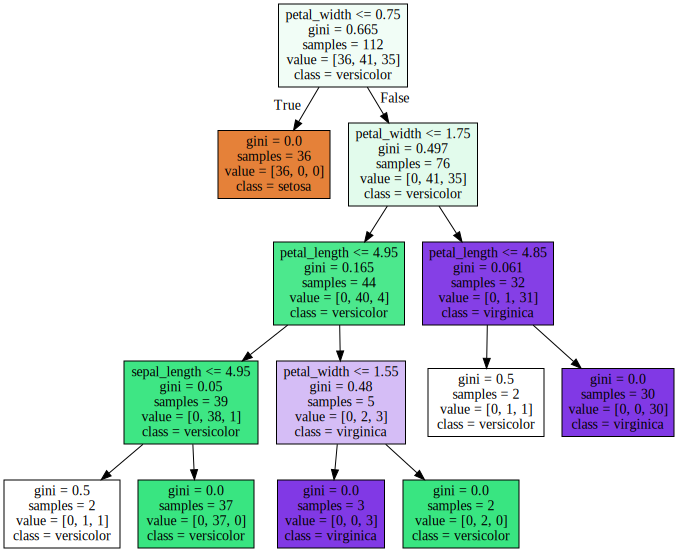

In [30]:
import sklearn
clsIris = DecisionTreeClassifier(min_samples_leaf=2)
resIris = clsIris.fit(irisdftrain.iloc[:,:-1], irisdftrain.iloc[:,-1])
resIris
dotDataIris = sklearn.tree.export_graphviz(resIris, out_file=None, 
                               feature_names=irisdftrain.columns[:-1], 
                                   class_names=irisdf['species'].unique(), filled=True)
graphIris = Source(dotDataIris)
graphIris

In [33]:
def highlightCell(s):
    diff = s['species'] == s['预测']
    return ['background-color: red' if diff is False else '']*6

In [72]:
clsIris.predict(irisdftest.iloc[:,:-1])
iristestcopy = irisdftest.copy()
iristestcopy.loc[:,'预测'] = clsIris.predict(irisdftest.iloc[:,:-1])
iristestcopy.style.apply(highlightCell, axis=1)

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'setosa', 'setosa',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa'], dtype=object)

,sepal_length,sepal_width,petal_length,petal_width,species,预测
129,7.2,3,5.8,1.6,virginica,versicolor
43,5,3.5,1.6,0.6,setosa,setosa
131,7.9,3.8,6.4,2,virginica,virginica
54,6.5,2.8,4.6,1.5,versicolor,versicolor
132,6.4,2.8,5.6,2.2,virginica,virginica
79,5.7,2.6,3.5,1,versicolor,versicolor
36,5.5,3.5,1.3,0.2,setosa,setosa
95,5.7,3,4.2,1.2,versicolor,versicolor
47,4.6,3.2,1.4,0.2,setosa,setosa
28,5.2,3.4,1.4,0.2,setosa,setosa


### 决策树的特点

- 非参数建模，不需要对数据给予任何假设

- 决策树相对容易解释，其算法对噪声具有较好的鲁棒性，并且冗余属性不会对分类准确率造成不利影响

- 数据碎片（data fragmentation）：决策树归纳采用自顶向下的方式，叶结点可能由于包含的数据记录过少，而不能做出具有统计意义的类别判断

- 子树重复，造成决策树过于复杂

In [10]:
treeRep = Digraph(format='svg', node_attr={'shape': 'rect'})
treeRep.node('A', 'P', shape='oval')
with treeRep.subgraph(name='cluster0') as a:
    a.attr(color='lightblue', style='filled')
    a.node('B','Q', shape='oval')
    a.node('C', 'S', shape='oval')
    a.node('D', '0')
    a.node('E', '0')
    a.node('F', '1')
    a.edges(['BC', 'BD', 'CE', 'CF'])
treeRep.node('G', 'R', shape='oval')
with treeRep.subgraph(name='cluster1') as a:
    a.attr(color='lightblue', style='filled')
    a.node('H','Q', shape='oval')
    a.node('I', 'S', shape='oval')
    a.node('J', '0')
    a.node('K', '0')
    a.node('L', '1')
    a.edges(['HI', 'HJ', 'IK', 'IL'])
treeRep.node('M','1')
treeRep.edges(['AB', 'AG', 'GH', 'GM'])
treeRep.render(filename='treeRep',directory='./img/classification/')

'./img/classification/treeRep.svg'

<img src="./img/classification/treeRep.svg" width=50%>

- 单一属性测试条件，限制了对复杂关系建模的能力

In [36]:
dbr = [(0.09,0.4,0),(0.1,0.1,0),(0.1,0.58,1),(0.15,0.9,1),(0.25,0.2,0),(0.3,0.7,1),
       (0.35,0.45,0),(0.4,0.5,1),(0.45,0.1,1),(0.5,0.35,0),(0.55,0.9,0),(0.68,0.25,1),
       (0.75,0.8,0),(0.9,0.6,0),(0.92,0.3,1)]
dbrdf = pd.DataFrame(dbr,columns=['x','y', 'class'])

对于如下的数据集，{{dbrdf}}

In [58]:
wtree = Digraph(format='svg', node_attr={'shape':'record','fontname':'STKAITI'})
wtree.node('A', 'x<0.43',shape='oval')
wtree.node('B','y<0.47',shape='oval')
wtree.node('C','y<0.33',shape='oval')
wtree.node('D','{v:4|o:0}')
wtree.node('E','{v:0|o:4}')
wtree.node('F','{v:0|o:3}')
wtree.node('G','{v:4|o:0}')
wtree.edge('A','B',xlabel='是')
wtree.edge('A','C',label='否')
wtree.edge('B','D',xlabel='是')
wtree.edge('B','E',label='否')
wtree.edge('C','F',label='是')
wtree.edge('C','G',label='否')
wtree.render(filename='wDecisionTree',directory='./img/classification/')

'./img/classification/wDecisionTree.svg'

<img src="./img/classification/wDecisionTree.svg" width=50%>

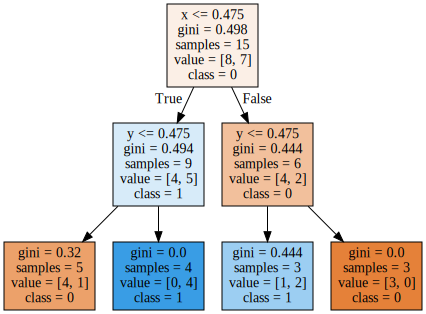

In [45]:
dbrdfDT = DecisionTreeClassifier(max_depth=2,min_samples_leaf=3)
dbrdfres = dbrdfDT.fit(dbrdf.iloc[:,:-1],dbrdf.iloc[:,-1])
dbrdfdot = sklearn.tree.export_graphviz(dbrdfres,out_file=None,filled=True,feature_names=['x','y'],class_names=['0','1'])
dbrdfgh = Source(dbrdfdot)
dbrdfgh

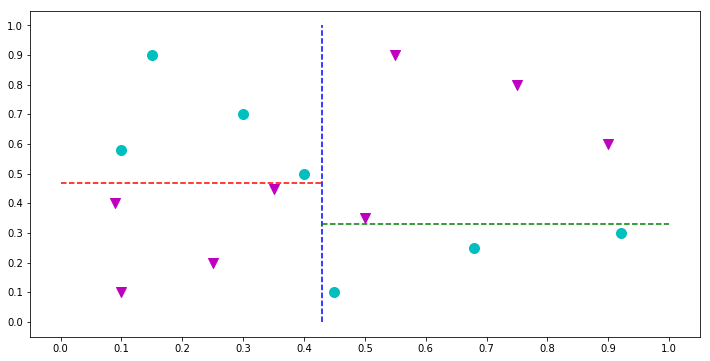

In [57]:
dbrdf0 = dbrdf.loc[dbrdf['class']==0,:]
dbrdf1 = dbrdf.loc[dbrdf['class']==1,:]
figdb, axdb = plt.subplots(figsize=(12,6))
axdb.scatter('x','y', s=100, c='m', marker='v', data=dbrdf0)
axdb.scatter('x','y', s=100, c='c', data=dbrdf1)
axdb.plot(np.ones(10)*0.43,np.linspace(0,1,num=10),'b--',
          np.linspace(0,0.43,num=4),np.ones(4)*0.47,'r--',
          np.linspace(0.43,1,num=4),np.ones(4)*0.33,'g--')
axdb.set_xticks(np.linspace(0,1,num=11))
axdb.set_yticks(np.linspace(0,1,num=11))
plt.savefig('./img/classification/wrongTree.svg',format='svg')

<img src="./img/classification/wrongTree.svg" width=100%>

- 两个不同类之间的边界被称为**决策边界**(decision boundary)

- 单个属性的测试条件只能形成平行于坐标轴的边界

> 一个可行的解决方法：构造**斜决策树**（oblique decision tree）

- 斜决策树可以同时使用多个属性构建一个测试条件

<img src="./img/classification/obliqueDT.png" with=100%>

测试条件：
$$
x+y<20
$$

## 模型过分拟合

### 分类模型的误差 

In [3]:
clerr = Digraph(format='svg',node_attr={'shape':'oval','fontname':'STKAITI'})
clerr.node('A','分类模型误差',shape='plaintext')
clerr.node('B','训练误差')
clerr.node('C','泛化误差')
clerr.edges(['AB','AC'])
clerr.render(filename='clerr',directory='./img/classification/')

'./img/classification/clerr.svg'

<img src="./img/classification/clerr.svg" width=100%>

- 训练误差（training error）：在训练集上误分类样本的比例

- 泛化误差（generalization error）：分类模型在未知记录上的期望误差

<Figure size 864x432 with 0 Axes>

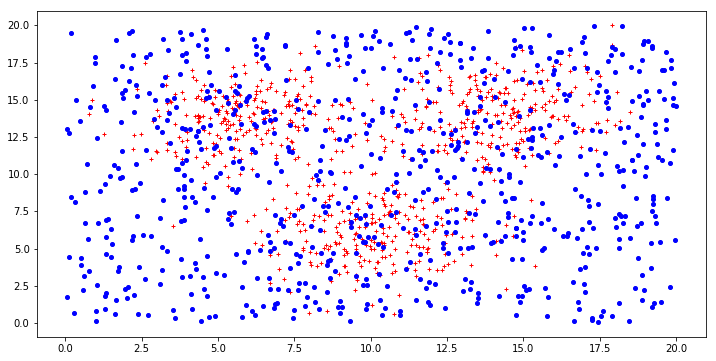

In [46]:
N = 1500

mean1 = [6, 14]
mean2 = [10, 6]
mean3 = [14, 14]
cov = [[3.5, 0], [0, 3.5]]  # diagonal covariance

np.random.seed(50)
X = np.random.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*np.random.rand(int(N/2),2)))
Y = np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))
plt.figure(figsize=(12,6))
plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',
         X[int(N/2):,0],X[int(N/2):,1],'bo',ms=4)
plt.savefig('./img/classification/overfittingMatrix.svg',format='svg')

<img src="./img/classification/overfittingMatrix.svg" width=100%>

- 分割训练集与检验集

In [48]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=1)

### 模型拟合不足（model underfitting）

- 生成深度为2的决策树

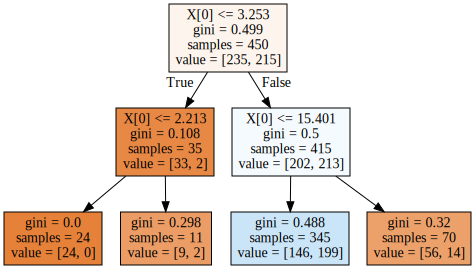

In [49]:
dt2 = sklearn.tree.DecisionTreeClassifi er(max_depth=2)
res2 = dt2.fit(X_train,Y_train)
dot2 = tree.export_graphviz(res2, out_file=None,filled=True)
graph2 = Source(dot2)
graph2

In [52]:
dt2PredTrain = dt2.predict(X_train)
dt2TrainErr = 1 - accuracy_score(Y_train, dt2PredTrain)
dt2PredTest = dt2.predict(X_test)
dt2TestErr = 1 - accuracy_score(Y_test, dt2PredTest)
'2层深度的决策树在训练集上的误差为：{}'.format(dt2TrainErr), '检验集上的误差为：{}'.format(dt2TestErr)

('2层深度的决策树在训练集上的误差为：0.36', '检验集上的误差为：0.3638095238095238')

> 决策树过小，决策树模型还未学习到数据的真实结构，造成训练和检验错误率都很大

- 生成深度为5的决策树

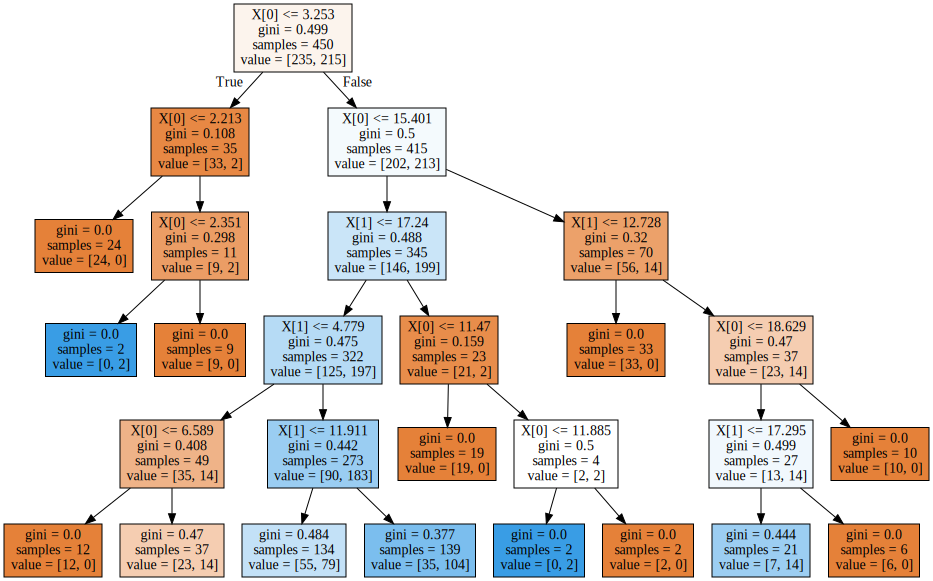

In [53]:
dt5 = tree.DecisionTreeClassifier(max_depth=5)
res5 = dt5.fit(X_train,Y_train)
dot5 = tree.export_graphviz(res5, out_file=None, filled=True)
graph5 = Source(dot5)
graph5

In [54]:
dt5PredTrain = dt5.predict(X_train)
dt5TrainErr = 1 - accuracy_score(Y_train, dt5PredTrain)
dt5PredTest = dt5.predict(X_test)
dt5TestErr = 1 - accuracy_score(Y_test, dt5PredTest)
'5层深度的决策树在训练集上的误差为：{}'.format(dt5TrainErr), '检验集上的误差为：{}'.format(dt5TestErr)

('5层深度的决策树在训练集上的误差为：0.2466666666666667', '检验集上的误差为：0.30000000000000004')

- 生成不同深度的决策树，比较错误率

In [58]:
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35 
testErr = np.zeros(len(maxdepths))

In [59]:
index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainErr[index] = 1 - accuracy_score(Y_train, Y_predTrain)
    testErr[index] = 1 - accuracy_score(Y_test, Y_predTest)
    index += 1

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'Max depth (number of nodes)')

Text(0, 0.5, 'Error rate')

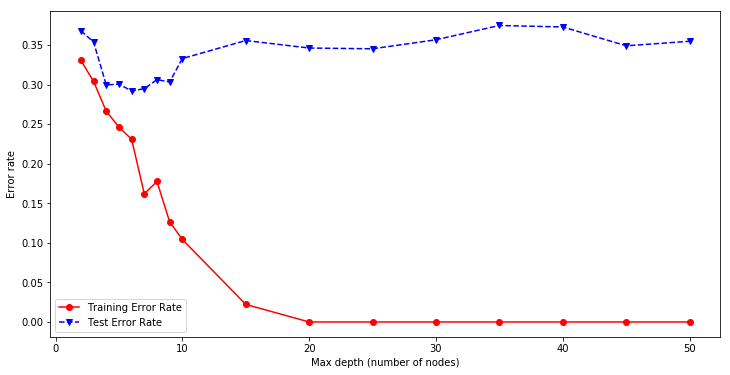

In [60]:
plt.figure(figsize=(12,6)) ainErr,'ro-',maxdepths,testErr,'bv--')
plt.legend(['Training Error Rate','Test Error Rate'])
plt.xlabel('Max depth (number of nodes)')
plt.ylabel('Error rate')

### 过分拟合

- 一个对训练集过度匹配的分类模型可以取得非常低的训练误差，但是其泛化误差却高于训练误差，这种现象被称作模型的过分拟合（model overfitting）

- 随着分类模型**复杂度**（complexity）的增加，训练误差会持续降低，但是这种模型会匹配了训练集中存在的噪声，从而导致较高的泛化误差

### 过分拟合的原因

- 训练集存在**噪声**
    + 错误分类的数据会干扰分类模型的构建准则

- 训练集缺乏**代表性**的样本
    + 训练集中的数据数量过少

- 多重比较过程（multiple comparison process）

一个股票分析师预测10次股票走势，至少8次正确的概率是

$$
p(8)=\frac{C_{10}^8+C_{10}^9+C_{10}^{10}}{2^{10}}=0.0547
$$

从50名股票分析师中找到一位能够至少8次预测正确的概率是

$$
1-(1-0.0547)^{50}=0.9399
$$

- 模型复杂度
    + 模型复杂度越高，训练误差越低，但是泛化误差却在增大

### 泛化误差估计

#### 利用训练误差估计泛化误差

<img src="./img/classification/optError.png" width=100%>

- 左边决策树在训练集上的错误率是 $e(T_L)=\frac{4}{24}=0.167$

- 右边决策树在训练集上的错误率是 $e(T_R)=\frac{6}{24}=0.25$

> 泛化误差的**乐观**估计，效果较差

#### 奥卡姆剃刀（Occam's razor）原则

> 给定两个具有相同泛化误差的模型，较简单的模型比较复杂的模型更可取

- **悲观估计**（pessimistic error estimate）：将模型的复杂度作为惩罚项（penalty terms）引入到泛化误差的估计中

假设决策树$T$有$k$个叶结点，$e(t_i), i=1,2,\cdots,k$为每个叶结点的训练误差，$\Omega(t_i)$为每个叶结点对应的惩罚项，$n(t_i)$是每个叶结点包含的数据记录个数，则泛化误差的悲观估计为

$$
e_g(T)=\frac{\sum_{i=1}^k[e(t_i)+\Omega(t_i)]}{\sum_{i=1}^kn(t_i)}=\frac{e(T)+\Omega(T)}{N_t}
$$

<img src="./img/classification/optError.png" width=100%>

假设$\Omega(t)=1$

- 左边决策树的泛化误差估计为 $e_g(T_L)=\frac{4+7\times1}{24}=\frac{11}{24}=0.458$

- 右边决策树的泛化误差估计为 $e_g(T_R)=\frac{6+4\times1}{24}=\frac{10}{24}=0.417$

#### 估计统计上界

- 根据训练误差的统计修正估计泛化误差

#### 使用确认集

- 将原始训练集分成两个子集，一个子集用于训练，另一个用于估计泛化误差，被称作**确认集**(validation set)

### 处理过分拟合

- 先剪枝
    + 提前设定不纯性度量增益或估计的泛化误差改进的阈值

- 后剪枝

## 评估分类器性能

也被称作**模型选择**（model selection）

In [3]:
modSel = Digraph(format='svg',node_attr={'fontname':'STKAITI'},graph_attr={'rankdir':'LR'})
modSel.node('A','模型选择方法',shape='plaintext')
modSel.node('B','保持方法\n Holdout')
modSel.node('B1','分成训练集与检验集，用检验集评估模型性能',shape='plaintext')
modSel.node('C','随机二次抽样')
modSel.node('C1','多次应用“保持方法”,但未控制每个记录用于训练与检验的次数',shape='plaintext')
modSel.node('D', '交叉验证')
modSel.node('E','自助法\n bootstrap')
modSel.edges(['AB','AC','AD','AE'])
modSel.edge('B','B1',shape='None')
modSel.edge('C','C1', style='None')
modSel.render(filename='modelSel',directory='./img/classification/')

'./img/classification/modelSel.svg'

<img src="./img/classification/modelSel.svg" width=100%>

### 交叉验证法

- 交叉验证（cross-validation）：每个记录用于训练的次数相同，并且恰好检验一次

- $k$折交叉验证（k-folder cross-validation）

<img src="./img/classification/grid_search_cross_validation.jpg" width=100%>

交叉验证的步骤：

1. $k-1$折数据作为训练集训练模型

2. 剩下的1折数据作为检验集测试分类模型的性能

3. 以所有循环性能度量的均值作为交叉验证的测试结果

### Python实现交叉验证

```python
sklearn.model_selection.cross_val_score(estimator, X, y=None, cv=’warn’)
```

- `estimator`：构建的分类模型

- `X`：输入的数据集

- `y`：目标属性

- `cv`：训练集的划分方法，`int`类型，表示具体的折数，默认是3折

- 返回值：每一次交叉验证的准确率

In [4]:
from sklearn.model_selection import cross_val_score

In [9]:
irisdt = DecisionTreeClassifier()
scores = cross_val_score(irisdt, irisdf.iloc[:,:-1], irisdf.iloc[:,-1], cv=10)
scores
"Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

'Accuracy: 0.96 (+/- 0.09)'